In [19]:
import xarray as xr
import numpy as np

# Open the existing dataset
# ds = xr.open_dataset("existing_dataset.nc", mode="a")

# Define dimensions and coordinates
time = np.arange(10)  # Example time dimension
lat = np.linspace(-90, 90, 180)  # Example latitude
lon = np.linspace(-180, 180, 360)  # Example longitude

# Create the data for the new variable
cph_data = np.full((len(time), len(lat), len(lon)), -1, dtype='i2')
ctt_data=np.full((len(time)), -1, dtype='i2')
ds = xr.Dataset(
    coords={
        "time": time,
    },
)
# Add the new variable with attributes
ds["cph"] = xr.DataArray(
    cph_data,
    dims=("time", "lat", "lon"),
    attrs={
        "cell_methods": "time: point",
        "flag_meanings": "clear liquid ice",
        "flag_values": "0s, 1s, 2s",
        "missing_value": -1,
        "grid_mapping": "projection",
        "units": "1",
        "long_name": "Cloud Thermodynamic Phase",
        "standard_name": "thermodynamic_phase_of_cloud_water_particles_at_cloud_top",
    },
    coords={
        "lat": lat,
        "lon": lon, }
)

# Save the updated dataset back to the NetCDF file
# ds.to_netcdf("existing_dataset.nc", mode="a")

In [3]:
import xarray as xr
import numpy as np

sat_data_cpp=xr.load_dataset("/wolke_scratch/dnikolo/CLAAS_Data/np/2021/01/02/CPPin20210102001500405SVMSGI1MD.nc")
sat_data_ctx=xr.load_dataset("/wolke_scratch/dnikolo/CLAAS_Data/np/2021/01/02/CTXin20210102001500405SVMSGI1MD.nc")
aux_data=xr.load_dataset("/wolke_scratch/dnikolo/CLAAS_Data/np/CM_SAF_CLAAS3_L2_AUX.nc",decode_times=False)


In [ ]:
lats=aux_data['lat'][0,:,:]
lons=aux_data['lon'][0,:,:]
new_lon = np.linspace(lons.min(),lons.max(),lons.shape[1])
new_lat = np.linspace(lats.max(),lats.min(),lats.shape[0])

In [129]:
cpp_data_2= sat_data_cpp.copy()
neded_vars=["cph","ctt","cth"]
cpp_data_2 = cpp_data_2.drop_vars(list(set(sat_data_cpp.data_vars.keys()) - set(neded_vars)))
cpp_data_2["lon"] = xr.DataArray(
            new_lon,
            dims=("x"),)
cpp_data_2["lat"] = xr.DataArray(
            new_lat,
            dims=("y"),)
cpp_data_2 =  cpp_data_2.swap_dims({"x":"lon", "y":"lat"})
cpp_data_2 = cpp_data_2.drop_vars(["x","y"])

cpp_data_2["cph_resampled"] = cpp_data_2["cph"].copy()
cpp_data_2["cph_resampled"].attrs = {
                "cell_methods": "time: point",
                "flag_meanings": "clear liquid ice",
                "flag_values": "0s, 1s, 2s",
                "missing_value": np.short(-1),
                'coordinates': 'lon lat',
                "units": "1",
                "long_name": "Cloud Thermodynamic Phase",
                "standard_name": "thermodynamic_phase_of_cloud_water_particles_at_cloud_top",
                #"_FillValue": np.int16(-1),
            }
cpp_data_2 = cpp_data_2.drop_vars("cph")
cpp_data_2

<xarray.Dataset> Size: 11MB
Dimensions:        (time: 1, nx: 3133, ny: 896, lon: 3133, lat: 896)
Coordinates:
  * time           (time) datetime64[ns] 8B 2021-01-02T00:15:00
  * nx             (nx) uint16 6kB 290 291 292 293 294 ... 3419 3420 3421 3422
  * ny             (ny) uint16 2kB 51 52 53 54 55 56 ... 941 942 943 944 945 946
  * lon            (lon) float64 25kB -79.74 -79.69 -79.64 ... 79.64 79.69 79.74
  * lat            (lat) float64 7kB 81.08 81.01 80.95 ... 26.17 26.11 26.04
Data variables:
    cph_resampled  (time, lat, lon) float32 11MB nan nan nan nan ... nan nan nan
Attributes: (12/45)
    filename:                                        CPPin20210102001500405SV...
    title:                                           ICDR of CM SAF CLoud pro...
    summary:                                         This file contains Cloud...
    comment:                                         Data in this file are st...
    creator_name:                                    DE/DWD
    creator_email:                                   contact.cmsaf@dwd.de
    ...                                              ...
    variable_id:                                     cwp,cot,cre,cdnc,cgt,cph
    id:                                              DOI:10.5676/EUM_SAF_CM/C...
    references:                                      https://doi.org/10.5676/...
    license:                                         The CM SAF data are owne...
    history:                                         Sun Dec  1 04:43:24 2024...
    NCO:                                             netCDF Operators version...

In [130]:
ctx_data_2 = sat_data_ctx.copy()
ctx_data_2["lon"] = xr.DataArray(
        new_lon,
        dims=("x"),)
ctx_data_2["lat"] = xr.DataArray(
        new_lat,
        dims=("y"),)
ctx_data_2 =  ctx_data_2.swap_dims({"x":"lon", "y":"lat"})
ctx_data_2 = ctx_data_2.drop_vars(["x","y"])

In [132]:
cpp_data_2["ctt_resampled"] = ctx_data_2["ctt"].copy() 
cpp_data_2["ctt_resampled"].attrs.update({
        #"_FillValue": np.float32(-1),
        "units": "K",
        "valid_range": [np.short(0), np.short(4060)],
        "standard_name": "air_temperature_at_cloud_top",
        "long_name": "Cloud Top Temperature",
        # "grid_mapping": "projection",
        'coordinates': 'lon lat',
        "cell_methods": "time: point",
        "add_offset": np.float32(0.0),
        "scale_factor": np.float32(0.1)
    })
ctx_data_2.drop_vars("ctt")
cpp_data_2["cth_resampled"] = ctx_data_2["cth"].copy() 
cpp_data_2["cth_resampled"].attrs.update({
        #"_FillValue": np.short(-1),
        "units": "m",
        "valid_range": [np.short(0), np.short(30000)],
        "standard_name": "cloud_top_altitude",
        "long_name": "Cloud Top Height",
        # "grid_mapping": "projection",
        'coordinates': 'lon lat',
        "cell_methods": "time: point",
        #"add_offset": np.float32(0.0),
        #"scale_factor": np.float32(1.0)
    })
ctx_data_2.drop_vars("cth")
cpp_data_2["lon"].attrs.update({"long_name":"longitude","standard_name":"longitude"})
cpp_data_2["lat"].attrs.update({"long_name":"latitude","standard_name":"latitude"})

In [135]:
cpp_data_2["cth_resampled"].encoding

{'dtype': dtype('int16'),
 'zlib': True,
 'szip': False,
 'zstd': False,
 'bzip2': False,
 'blosc': False,
 'shuffle': True,
 'complevel': 4,
 'fletcher32': False,
 'contiguous': False,
 'chunksizes': (1, 896, 1856),
 'preferred_chunks': {'time': 1, 'y': 896, 'x': 1856},
 'source': '/wolke_scratch/dnikolo/CLAAS_Data/np/2021/01/02/CTXin20210102001500405SVMSGI1MD.nc',
 'original_shape': (1, 896, 3133),
 '_FillValue': -1,
 'scale_factor': 1.0,
 'add_offset': 0.0}

In [134]:
cpp_data_2.to_netcdf("/wolke_scratch/dnikolo/TEST/New_var_method.nc")

ValueError: failed to prevent overwriting existing key add_offset in attrs on variable 'ctt_resampled'. This is probably an encoding field used by xarray to describe how a variable is serialized. To proceed, remove this key from the variable's attributes manually.

In [125]:
# cpp_data_2 = cpp_data_2.assign_coords({"lon":new_lon, "lat":new_lat})


# cpp_data_2.drop(["x","y"])
cpp_data_2

<xarray.Dataset> Size: 34MB
Dimensions:        (time: 1, nx: 3133, ny: 896, lon: 3133, lat: 896)
Coordinates:
  * time           (time) datetime64[ns] 8B 2021-01-02T00:15:00
  * nx             (nx) uint16 6kB 290 291 292 293 294 ... 3419 3420 3421 3422
  * ny             (ny) uint16 2kB 51 52 53 54 55 56 ... 941 942 943 944 945 946
  * lon            (lon) float64 25kB -79.74 -79.69 -79.64 ... 79.64 79.69 79.74
  * lat            (lat) float64 7kB 81.08 81.01 80.95 ... 26.17 26.11 26.04
Data variables:
    cph_resampled  (time, lat, lon) float32 11MB nan nan nan nan ... nan nan nan
    ctt_resampled  (time, lat, lon) float32 11MB nan nan nan nan ... nan nan nan
    cth_resampled  (time, lat, lon) float32 11MB nan nan nan nan ... nan nan nan
Attributes: (12/45)
    filename:                                        CPPin20210102001500405SV...
    title:                                           ICDR of CM SAF CLoud pro...
    summary:                                         This file contains Cloud...
    comment:                                         Data in this file are st...
    creator_name:                                    DE/DWD
    creator_email:                                   contact.cmsaf@dwd.de
    ...                                              ...
    variable_id:                                     cwp,cot,cre,cdnc,cgt,cph
    id:                                              DOI:10.5676/EUM_SAF_CM/C...
    references:                                      https://doi.org/10.5676/...
    license:                                         The CM SAF data are owne...
    history:                                         Sun Dec  1 04:43:24 2024...
    NCO:                                             netCDF Operators version...

In [126]:
(
cpp_data_2.assign_coords({"x":new_lon, "y":new_lat})
        .rename_dims({"x":"lon", "y":"lat"})
        .rename({"x":"lon", "y":"lat"}))

ValueError: Cannot rename x to lon because lon already exists. Try using swap_dims instead.

In [2]:
import xarray as xr
da = xr.tutorial.open_dataset('air_temperature')
da

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [ ]:
da.isel(lat=slice(None, None, -1))

In [ ]:
(cpp_data_2
 .assign_coords({"x": data.Letter.values})
 .assign_coords({"Number":data.Number.values})
 .drop("Letter")
 .rename_dims({"x":"lon"})      
 .rename({"y":"lat"}))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


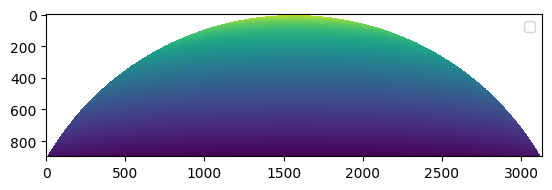

In [3]:
import matplotlib.pyplot as plt
plt.imshow(aux_data['lat'][0,:,:])
plt.legend()

In [4]:
lats=aux_data['lat'][0,:,:]
lons=aux_data['lon'][0,:,:]

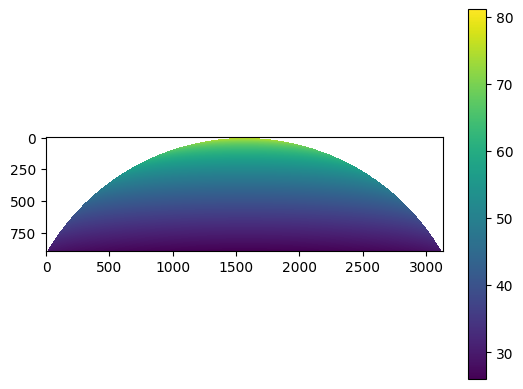

In [5]:
plt.imshow(lats)
plt.colorbar()

In [7]:
res_lats=np.repeat(lats.mean(axis=1).to_numpy(),lats.shape[1],axis=0).reshape(lats.shape)
res_lons=np.repeat(lons.mean(axis=0).to_numpy(),lons.shape[0],axis=0).reshape([lons.shape[1],lons.shape[0]]).T

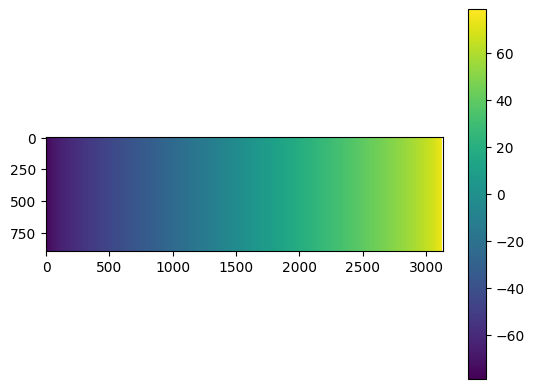

In [8]:
plt.imshow(res_lons)
plt.colorbar()

In [12]:
print(np.sqrt(((res_lons - lons) ** 2).mean()))

<xarray.DataArray 'lon' ()> Size: 8B
array(6.46167564)
Coordinates:
    georef_offset_corrected  uint8 1B 0


In [16]:
import os

In [20]:

os.uname()[1]

'n2o'

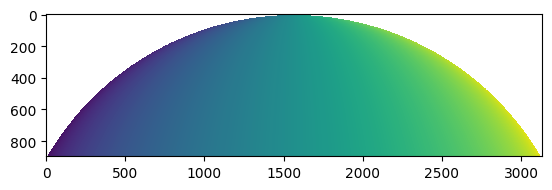

In [13]:
plt.imshow(lons)

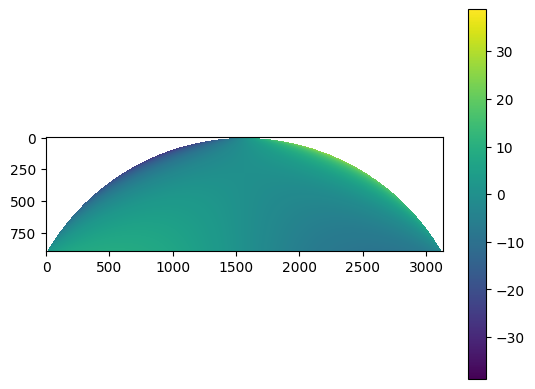

In [10]:
plt.imshow(lons-res_lons)
plt.colorbar()

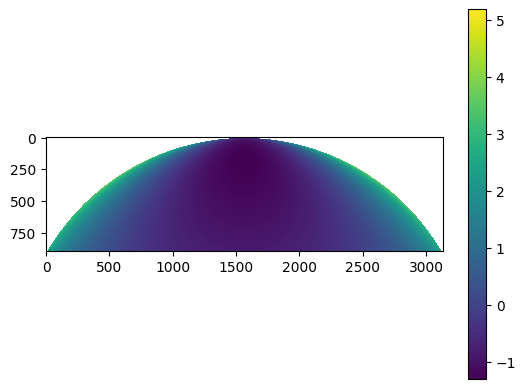

In [9]:
plt.imshow(aux_data['lat'][0,:,:]-res_lats)
plt.colorbar()

In [51]:
Transformer=Projection_transformer()
Transformer.generate_lat_lon_prj(aux_data)
remaped=Transformer.remap_data(sat_data["cph"].data)

Bounds = [-81.12711304308402, 81.12650389547038, -81.07451709373741, 81.07635224475464]


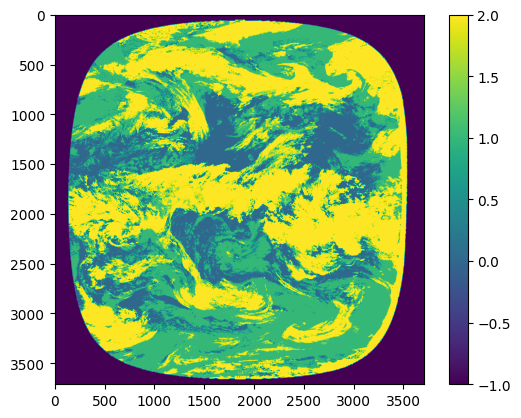

In [45]:
import matplotlib.pyplot as plt
plt.imshow(remaped[0,:,:])
plt.colorbar()

In [55]:
sat_data["cph"].data=remaped

In [2]:
import os
import xarray as xr
from Resample_data import Projection_transformer
from Resampling_file_search import filenames_to_resample

def resample_files(filenames_it):
    transformer= Projection_transformer()
    transformer.generate_lat_lon_prj(os.path.join(CLAAS_FP,'claas3_level2_aux_data.nc'))
    data= xr.load_mfdataset(filenames_it)
    data["cph"]



In [1]:
import os
filename="/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040119193000405SVMSG01MD.nc"


In [7]:
os.path.join(*(filename.split(os.path.sep)[-3:]))

'2004_01/CPH/CPPin20040119193000405SVMSG01MD.nc'

In [4]:
resample_target_filenames=filenames_to_resample()
print(resample_target_filenames)


{'2004_01'}
['/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040120120000405SVMSG01MD.nc', '/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040120120000405SVMSG01MD.nc', '/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040120121500405SVMSG01MD.nc', '/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040120123000405SVMSG01MD.nc', '/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040120124500405SVMSG01MD.nc', '/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040120130000405SVMSG01MD.nc']


In [5]:
data=xr.load_mfdataset(resample_target_filenames)

NameError: name 'generate_lat_lon_prj' is not defined

In [3]:
resample_target_filenames=filenames_to_resample()
print(resample_target_filenames)

{'2004_01'}
['/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040120120000405SVMSG01MD.nc', '/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040120120000405SVMSG01MD.nc', '/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040120121500405SVMSG01MD.nc', '/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040120123000405SVMSG01MD.nc', '/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040120124500405SVMSG01MD.nc', '/cluster/work/climate/dnikolo/CLAAS_Data/Unprocessed_data/2004_01/CPH/CPPin20040120130000405SVMSG01MD.nc']


In [4]:
data=resample_files(resample_target_filenames)

In [9]:
print(data["cph"][:,:,:])

<xarray.DataArray 'cph' (time: 5, y: 3712, x: 3712)> Size: 276MB
dask.array<concatenate, shape=(5, 3712, 3712), dtype=float32, chunksize=(1, 1856, 1856), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 40B 2004-01-20T12:00:00 ... 2004-01-20T13:...
  * x        (x) float64 30kB -0.1556 -0.1555 -0.1554 ... 0.1554 0.1555 0.1556
  * y        (y) float64 30kB 0.1556 0.1555 0.1554 ... -0.1554 -0.1555 -0.1556
Attributes:
    grid_mapping:   projection
    flag_values:    [0 1 2]
    flag_meanings:  clear liquid ice
    standard_name:  thermodynamic_phase_of_cloud_water_particles_at_cloud_top
    long_name:      Cloud Thermodynamic Phase
    units:          1
    valid_range:    [0 2]
    cell_methods:   time: point
